In [26]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [25]:
# abvi
abvi = pd.read_csv('Arab_Barometer_Wave_6_Part_1_ENG_RELEASE.csv')
abvi_final = abvi[['Q601_3','COUNTRY']]
abvi_final = abvi_final.rename({'Q601_3':'data', 'COUNTRY':'country'},axis='columns')
# abvi_final = abvi_final.drop(abvi_final[abvi_final.data >5].index)
abvi_final['Period'] = '2020-2021'


# abv
abv = pd.read_csv('ABV_Release_Data.csv')
abv_final = abv[['Q601_3','country']]
abv_final = abv_final.rename({'Q601_3':'data'},axis='columns')
# abv_final = abv_final.drop(abv_final[abv_final.data >5].index)
abv_final['Period']='2018-2019'


# abiv
abiv = pd.read_csv("ABIV_English.csv")
abiv_final = abiv[['q6013','country']]
abiv_final = abiv_final.rename({'q6013':'data'},axis='columns')

abiv_final.loc[abiv_final['data'].str.contains('strongly agree'),'data']=1
abiv_final['data']=abiv_final.data.replace(r'I agree','2')
abiv_final['data']=abiv_final.data.replace(r'I disagree','3')
abiv_final['data']=abiv_final.data.replace(r'I strongly disagree','4')
abiv_final['Period'] = '2016-2017'


# abiii
abiii = pd.read_csv('ABIII_English.csv')
abiii_final = abiii[['q6013','country']]
abiii_final = abiii_final.rename({'q6013':'data'},axis='columns')

abiii_final['data']=abiii_final.data.replace(r'I strongly agree','1')
abiii_final['data']=abiii_final.data.replace(r'I somewhat agree','2')
abiii_final['data']=abiii_final.data.replace(r'I somewhat disagree','3')
abiii_final['data']=abiii_final.data.replace(r'I strongly disagree','4')
abiii_final['Period'] = '2012-2014'



# abii
abii = pd.read_csv('ABII_English.csv')
abii_final = abii[['q60103','country']]
abii_final = abii_final.rename({'q60103':'data'},axis='columns')


abii_final['data']=abii_final.data.replace(r'1. i strongly agree','1')
abii_final['data']=abii_final.data.replace(r'2. i agree','2')
abii_final['data']=abii_final.data.replace(r'3. i disagree','3')
abii_final['data']=abii_final.data.replace(r'4. i strongly disagree','4')
abii_final['country'] = abii_final['country'].apply(lambda x: x.split('. ')[1])

abii_final['Period'] = '2010-2011'



# abi
abi = pd.read_csv('ABI_English.csv')
abi_final = abi[['q5053','country']]
abi_final = abi_final.rename({'q5053':'data'},axis='columns')


abi_final['data']=abi_final.data.replace(r'agree','2')
abi_final['data']=abi_final.data.replace(r'strongly agree','1')
abi_final['data']=abi_final.data.replace(r'disagree','3')
abi_final['data']=abi_final.data.replace(r'strongly disagree','4')
abi_final['Period'] = '2006-2007'

final_df1 = pd.concat([abi_final,abii_final, abiii_final, abiv_final, abv_final, abvi_final])


/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20529/3054187768.py:18: DtypeWarning: Columns (2,6,39,41,44,45,46,47,97,99,101,103,169,172,179,197,198,199,200,213,223,229,231,232,235,237,238,241,245,249,252,260,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,287,289) have mixed types. Specify dtype option on import or set low_memory=False.
  abiv = pd.read_csv("ABIV_English.csv")
/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20529/3054187768.py:30: DtypeWarning: Columns (7,10,31,32,33,34,35,36,43,44,49,50,51,52,70,71,96,99,188,189,190,191,192,193,194,195,196,203,204,205,206,207,208,209,210,211,230,231,240,241,242,243,244,245,246,247,248,265,266,268,269,270,283,291,292,293,294,295) have mixed types. Specify dtype option on import or set low_memory=False.
  abiii = pd.read_csv('ABIII_English.csv')
/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20529/3054187768.py:43: DtypeWarning: Columns (2,3,6,13,18,23,24,25,26,27,

In [22]:
final_df = final_df1.copy()


In [27]:
# fill NA to  a string to show the distribution
final_df['data'] = final_df['data'].fillna('NA')
final_df['data'].value_counts()

2    26319
1    23807
3    16358
4     8302
Name: data, dtype: int64

In [28]:
# getting rid of the string
final_df['data'] = pd.to_numeric(final_df['data'], errors='coerce')

# filtering data above 5, i.e no response, recasting to int, and distribution
final_df = final_df[final_df['data'] < 5]
final_df['data'] = final_df['data'].astype(int)
final_df['data'].value_counts()

2    26319
1    23807
3    16358
4     8302
Name: data, dtype: int64

In [29]:
country_dict = {1: 'Algeria',
                5: 'Egypt',
                7: 'Iraq',
                8: 'Jordan',
                9: 'Kuwait',
                10: 'Lebanon',
                11: 'Libya',
                13: 'Morocco',
                15: 'Palestine',
                19: 'Sudan',
                21: 'Tunisia',
                22: 'Yemen'}

final_df['country'] = final_df['country'].apply(lambda x: country_dict[x] if isinstance(x, int) else x.lower())
final_df['country'] = final_df['country'].apply(lambda x: x.title() if isinstance(x, str) else x)
final_df['country'].value_counts()

Jordan          8900
Lebanon         8583
Algeria         7984
Palestine       7300
Tunisia         6811
Morocco         6581
Egypt           5906
Yemen           5438
Iraq            4842
Sudan           4449
Libya           3871
Kuwait          2381
Saudi Arabia    1338
Bahrain          402
Name: country, dtype: int64

In [30]:
agg_dict = {'Period': 'nunique', 'data': 'sum'}
grouped_data = final_df.groupby('country').agg(agg_dict)
grouped_data['data'] = grouped_data['data'].astype(int)
# grouped_data = grouped_data[grouped_data["Period"] < 3]
grouped_data.sort_values(by='Period')

,Period,data
country,,
Bahrain,1,859
Saudi Arabia,1,2401
Kuwait,2,4999
Iraq,3,9494
Libya,3,8087
Sudan,3,8002
Egypt,4,10897
Yemen,4,10384
Morocco,5,16862


In [31]:
# Count the number of unique dates that each country appears in
country_date_counts = final_df.groupby('country')['Period'].nunique()

# Filter the DataFrame to include only the countries that appear in three or more unique dates
included_countries = country_date_counts[country_date_counts >= 3].index
filtered_df = final_df[final_df['country'].isin(included_countries)]
filtered_df['country'].value_counts()

Jordan       8900
Lebanon      8583
Algeria      7984
Palestine    7300
Tunisia      6811
Morocco      6581
Egypt        5906
Yemen        5438
Iraq         4842
Sudan        4449
Libya        3871
Name: country, dtype: int64

In [32]:
means = filtered_df.groupby(['country', 'Period'])['data'].mean()
means = pd.DataFrame(means)
means=means.round(2).unstack(level=1)
means

data                                                  
Period    2006-2007 2010-2011 2012-2014 2016-2017 2018-2019 2020-2021
country                                                              
Algeria        1.89      2.12      2.19      1.83      2.05      2.33
Egypt           NaN      1.46      2.06      1.79      1.96       NaN
Iraq            NaN      1.99      1.99       NaN      1.94       NaN
Jordan         1.84      1.89      1.91      1.91      2.00      2.32
Lebanon        2.38      2.62      2.83      2.33      2.57      3.07
Libya           NaN       NaN      1.82       NaN      2.18      2.30
Morocco        2.34       NaN      2.58      2.39      2.67      2.78
Palestine      1.72      1.87      2.04      2.02      2.15       NaN
Sudan           NaN      1.68      1.91       NaN      1.83       NaN
Tunisia         NaN      1.95      2.35      2.32      2.36      2.76
Yemen          1.71      1.85      1.94       NaN      1.98       NaN

In [33]:
pct_change_by_period = means.pct_change(axis=1)
pct_change_by_period= pd.DataFrame((pct_change_by_period['data']*100).round(2))
pct_change_by_period = pct_change_by_period.rename(columns={'data':'PoP Percentage Change'})
pct_change_by_period['Average'] = pct_change_by_period.apply(lambda row: row[(row.notna()) & (row != 0)].mean(), axis=1).round(2)
pct_change_by_period.replace(0, np.nan)


Period,2006-2007,2010-2011,2012-2014,2016-2017,2018-2019,2020-2021,Average
country,,,,,,,
Algeria,NaN,12.17,3.30,-16.44,12.02,13.66,4.94
Egypt,NaN,NaN,41.10,-13.11,9.50,NaN,12.50
Iraq,NaN,NaN,NaN,NaN,-2.51,NaN,-2.51
Jordan,NaN,2.72,1.06,NaN,4.71,16.00,6.12
Lebanon,NaN,10.08,8.02,-17.67,10.30,19.46,6.04
Libya,NaN,NaN,NaN,NaN,19.78,5.50,12.64
Morocco,NaN,NaN,10.26,-7.36,11.72,4.12,4.69
Palestine,NaN,8.72,9.09,-0.98,6.44,NaN,5.82
Sudan,NaN,NaN,13.69,NaN,-4.19,NaN,4.75


In [34]:
means_pct_change_from_first_period = means.copy()
def percentage_change(row):
    first_period = row.dropna().iloc[0]
    last_period = row.dropna().iloc[-1]
    return ((last_period - first_period) / first_period * 100).round(2)
means_pct_change_from_first_period['Percentage Change from First Period'] = means_pct_change_from_first_period.apply(percentage_change, axis=1)
means_pct_change_from_first_period

data                                                    \
Period    2006-2007 2010-2011 2012-2014 2016-2017 2018-2019 2020-2021   
country                                                                 
Algeria        1.89      2.12      2.19      1.83      2.05      2.33   
Egypt           NaN      1.46      2.06      1.79      1.96       NaN   
Iraq            NaN      1.99      1.99       NaN      1.94       NaN   
Jordan         1.84      1.89      1.91      1.91      2.00      2.32   
Lebanon        2.38      2.62      2.83      2.33      2.57      3.07   
Libya           NaN       NaN      1.82       NaN      2.18      2.30   
Morocco        2.34       NaN      2.58      2.39      2.67      2.78   
Palestine      1.72      1.87      2.04      2.02      2.15       NaN   
Sudan           NaN      1.68      1.91       NaN      1.83       NaN   
Tunisia         NaN      1.95      2.35      2.32      2.36      2.76   
Yemen          1.71      1.85      1.94       NaN      1.98       NaN   

          Percentage Change from First Period  
Period                                         
country                                        
Algeria                                 23.28  
Egypt                                   34.25  
Iraq                                    -2.51  
Jordan                                  26.09  
Lebanon                                 28.99  
Libya                                   26.37  
Morocco                                 18.80  
Palestine                               25.00  
Sudan                                    8.93  
Tunisia                                 41.54  
Yemen                                   15.79

In [35]:
means_top5 = means.max(axis=1).nlargest(5)
means_top5

country
Lebanon    3.07
Morocco    2.78
Tunisia    2.76
Algeria    2.33
Jordan     2.32
dtype: float64

In [36]:
pct_change_by_period_top5 = pct_change_by_period.max(axis=1).nlargest(5)
pct_change_by_period_top5

country
Egypt      41.10
Tunisia    20.51
Libya      19.78
Lebanon    19.46
Jordan     16.00
dtype: float64

In [37]:
means_pct_change_from_first_period['Percentage Change from First Period'].mean()

22.41181818181818

In [48]:
# Compute the mean and standard error of the mean for each country and time period
means = filtered_df.groupby(['Period', 'country'])['data'].mean()
n = filtered_df.groupby(['Period', 'country'])['data'].count()
se = filtered_df.groupby(['Period', 'country'])['data'].std() / np.sqrt(n)
filtered_df['Country'] = filtered_df['country'].str.title()

# Calculate the t-value for a 95% confidence interval with n-1 degrees of freedom
t_value = stats.t.ppf(0.975, n-1)

# Calculate the confidence interval for each country and time period
ci = t_value * se


# Compute the upper and lower bounds for each country and time period
bounds = pd.concat([means - ci, means + ci], axis=1, keys=['Lower Bound', 'Upper Bound'])

# Reshape the DataFrame to have separate columns for the upper and lower bounds
bounds = bounds.stack().unstack(level=1)

# Rename the index levels to 'Confidence Intervals' and 'Date'
bounds.index.names = ['Period', 'Confidence Intervals']

# Sort the index by country and date
bounds = bounds.sort_index()
bounds = bounds.round(3)

bounds.T.to_csv('esthertest.csv')


/var/folders/0y/tw20xqcj0v91d_rjglh0scw80000gn/T/ipykernel_20529/4224978225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Country'] = filtered_df['country'].str.title()


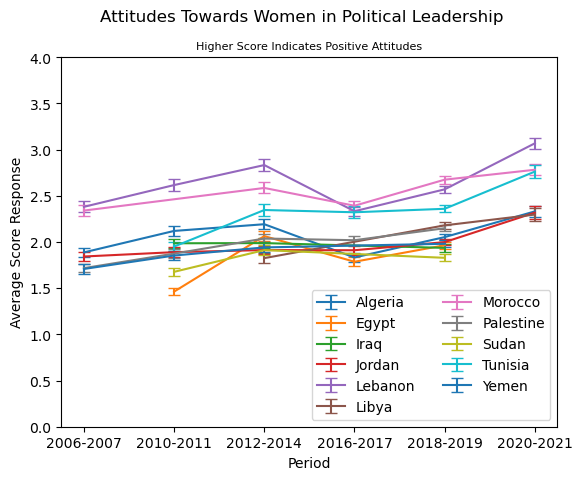

In [47]:

# Plot the data for each country as a separate line with error bars representing the confidence interval
fig, ax = plt.subplots()
for country in included_countries:
    x = means.loc[pd.IndexSlice[:, country]].index.get_level_values(0)
    y = means.loc[pd.IndexSlice[:, country]]
    err = ci.loc[pd.IndexSlice[:, country]]
    ax.errorbar(x, y, yerr=err, label=country, capsize=4)

# Set the title and axis labels
plt.title('Higher Score Indicates Positive Attitudes',fontsize=8)
plt.suptitle('Attitudes Towards Women in Political Leadership')
ax.set_xlabel('Period')
ax.set_ylabel('Average Score Response')
ax.set_ylim(0,4)
ax.legend(loc='lower right', ncol=4)

handles, labels = ax.get_legend_handles_labels()
for i, label in enumerate(labels):
    labels[i] = label.title()
ax.legend(handles, labels, loc='lower right', ncol=2)

plt.show()

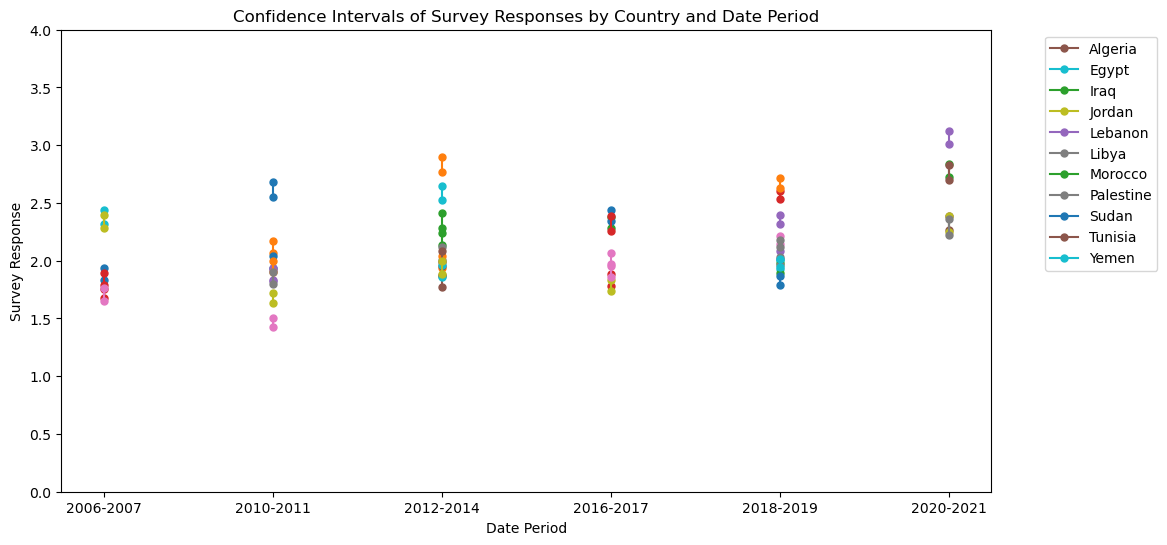

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Assuming the given DataFrame is named `bounds`
countries = bounds.columns
date_periods = bounds.index.levels[0].tolist()

# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through countries and date_periods to plot confidence intervals
for idx, country in enumerate(countries):
    for period_idx, date_period in enumerate(date_periods):
        lower_bound = bounds.loc[(date_period, 'Lower Bound'), country]
        upper_bound = bounds.loc[(date_period, 'Upper Bound'), country]

        if not (np.isnan(lower_bound) or np.isnan(upper_bound)):
            plt.plot([period_idx] * 2, [lower_bound, upper_bound], marker='o', linestyle='-', linewidth=1.5, markersize=5, label=country)

# Set the x-axis labels
plt.xticks(range(len(date_periods)), date_periods)

# Add title and labels
plt.title("Confidence Intervals of Survey Responses by Country and Date Period")
plt.xlabel("Date Period")
plt.ylabel("Survey Response")
plt.ylim(0,4)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()


country,Algeria,Egypt,Iraq,Jordan,Lebanon,Libya,Morocco,Palestine,Sudan,Tunisia,Yemen
Period,,,,,,,,,,,
2006-2007,0.103,NaN,NaN,0.098,0.118,NaN,0.110,0.085,NaN,NaN,0.115
2010-2011,0.101,0.081,0.103,0.104,0.131,NaN,NaN,0.097,0.086,0.099,0.102
2012-2014,0.105,0.114,0.102,0.092,0.133,0.103,0.120,0.101,0.109,0.131,0.110
2016-2017,0.101,0.101,NaN,0.094,0.100,NaN,0.102,0.101,NaN,0.134,NaN
2018-2019,0.068,0.077,0.081,0.070,0.076,0.069,0.087,0.067,0.074,0.073,0.074
2020-2021,0.121,NaN,NaN,0.136,0.120,0.138,0.120,NaN,NaN,0.132,NaN


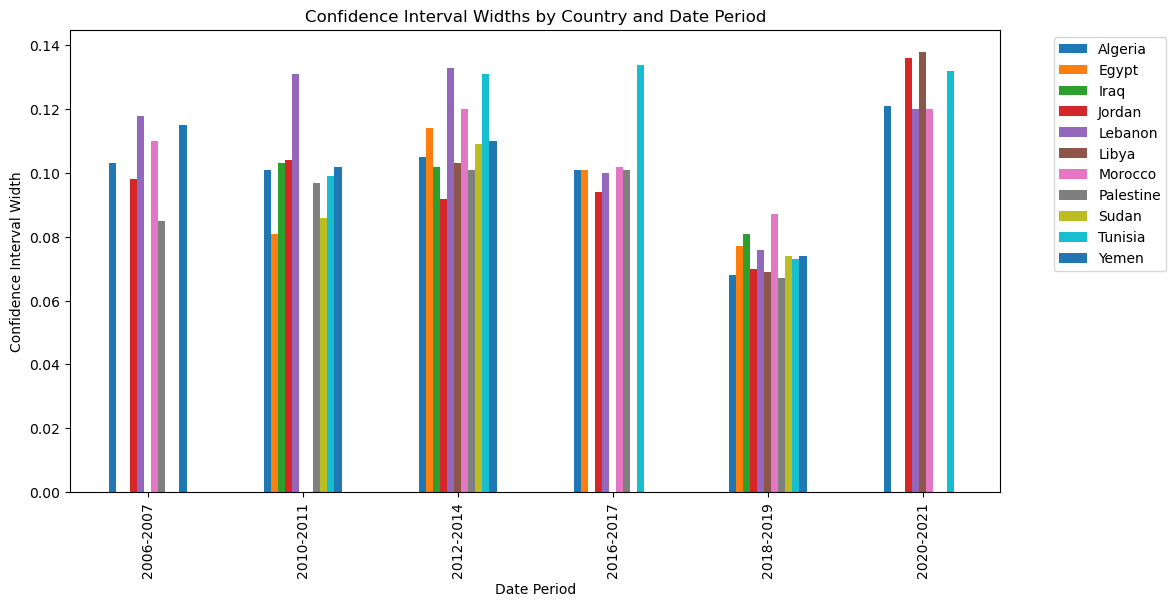

In [43]:
# Get the upper and lower bounds as separate DataFrames
upper_bounds = bounds.xs('Upper Bound', level=1)
lower_bounds = bounds.xs('Lower Bound', level=1)

# Calculate the confidence interval widths
interval_widths = upper_bounds - lower_bounds
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the confidence interval widths as a bar plot
interval_widths.plot(kind='bar', ax=ax)

# Set the x-axis labels
plt.xticks(range(len(date_periods)), date_periods)

# Add title and labels
plt.title("Confidence Interval Widths by Country and Date Period")
plt.xlabel("Date Period")
plt.ylabel("Confidence Interval Width")

# Add a legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

display(interval_widths)
# Show the plot
plt.show()


In [44]:
average_interval_widths = interval_widths.mean(axis=1, skipna=True)
average_interval_width= pd.DataFrame(average_interval_widths,columns=['Average Interval Widths'])
average_interval_width.reset_index(inplace=True)
display(average_interval_width)

average_interval_widths_by_country = interval_widths.mean(axis=0, skipna=True)
average_interval_width_by_country= pd.DataFrame(average_interval_widths_by_country,columns=['Average Interval Widths'])
average_interval_width_by_country.reset_index(inplace=True)
average_interval_width=average_interval_width.rename(columns={'country':'Country'})
display(average_interval_width_by_country)

,Period,Average Interval Widths
0,2006-2007,0.104833
1,2010-2011,0.100444
2,2012-2014,0.110909
3,2016-2017,0.104714
4,2018-2019,0.074182
5,2020-2021,0.127833


,country,Average Interval Widths
0,Algeria,0.099833
1,Egypt,0.093250
2,Iraq,0.095333
3,Jordan,0.099000
4,Lebanon,0.113000
5,Libya,0.103333
6,Morocco,0.107800
7,Palestine,0.090200
8,Sudan,0.089667
9,Tunisia,0.113800


In [45]:
average_interval_width['Average Interval Widths'].mean()

0.10381938431938435

In [46]:
average_interval_width_by_country['Average Interval Widths'].mean()

0.10049696969696971